<a href="https://colab.research.google.com/github/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preparando ambiente para realizar a análise**

---
**Objetivo**


*  Conectar na plataforma Kaggle com o Google Colab.

---
**Passo a passo**

1.   Criar um token para utilzar a API do Kaggle, retornando um aquivo .json e realizar o upload desse arquivo para o colab.

  *   é um arquivo de configuração que contém minhas credênciais de API do Kaggle.
  *   essas credênciais permitem que você se autentique na API do Kaggle e faça downloads de datasets diretamente do Kaggle.

2.   Usa o comando ***'pip install kaggle -q'*** para instalar a biblioteca 'Kaggle', que é uma interface Python para a API do Kaggle.
  *   é o que permite o acesso aos datasets.
  *   o argumento '-q' é abreviação de "quiet", e faz com que o comando pip simplifique a saída de informações durante o processo de instalação.

3. É necessario criar uma pasta que armazene o arquivo kaggle.json para que seja possível realizar o acesso a API. Foi feito:

  *   Criação da pasta.
  *   Movimentação do arquivo .json para a pasta criada.
  *   Atribuir uma permissão para a pasta criada.
  *   Essa pasta não é visivel no painel de arquivos do Colab, mas ainda sim é manipulavel via comandos do sheel.
     * !ls -la ~/.kaggle (listar conteudo do diretório).


4. Agora será feito o dowload do dataset que sera trabalhado nessa análise.


5. Realizando o unzip no dataset encontrado.
  - /content/titanic



---



1.   Upload do kaggle.json

In [ ]:
from google.colab import files
uploaded = files.upload()

---

2.   Instalando a biblioteca Kaggle

In [150]:
pip install kaggle -q

---



3.   Criando a pasta

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle

---


4.   Dowload do dataset


In [ ]:
%cd /content/

!kaggle competitions download titanic

---


5.   Realizando unzip

In [ ]:
!unzip titanic.zip -d titanic

---

# **Quem é mais provável sobreviver ao titanic ?**

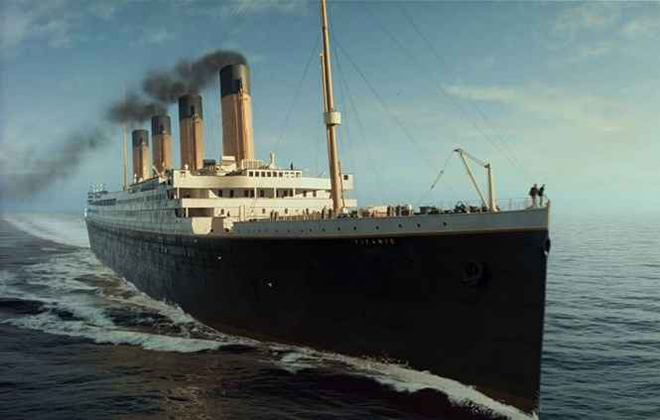

- O objetivo é usar  aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.
- O resultado é avaliado através da **Acurácia**.

- Descrição do dataset
  - **PassengerId**: Id do passageiro
  - **Survived**:  (0) - No,  (1) - Yes
  - **Pclass** (Ticket da classe): 1 = 1st, 2 = 2nd, 3 = 3rd
  - **Name**: Nome
  - **Sex**: Sexo
  - **Age**: Idade
  - **SibSp**: Quantidade de irmãos/cônjuges a bordo
  - **Parch**: Quantidade de pais/filhos a bordo
  - **Ticket**: Número do ticket
  - **Fare**: Tarifa de passageiros
  - **Cabin**: Número da cabine
  - **Embarked**: Porto aonde embarcou ( C = Cherbourg, Q = Queenstown, S = Southampton)
    

## Analisando a base
- Para isso foi usado o ydata-profilling para auxiliar no entendimento da base
  - https://github.com/ydataai/ydata-profiling

- Entendendo a base de treino

In [154]:
# Importando pandas

import pandas as pd

In [155]:
treino = pd.read_csv('/content/titanic/train.csv')
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
!pip install ydata-profiling

In [ ]:
# Importando o ProfileReport do ydata-profiling
from ydata_profiling import ProfileReport

# Gerando a visualização
profile = ProfileReport(treino, title="titanic_treino")

# Criando o relatório
profile.to_file("titanic_treino.html")

In [158]:
# Verificando informações da base
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
#Veficando o tipo dos dados
treino.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [160]:
#Verificando valores nulos
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

- Entendendo a base de teste

In [161]:
# Visualizando base de teste
teste = pd.read_csv('/content/titanic/test.csv')
teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [163]:
# Verificando informações da base
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [164]:
# Analisando balores nulos
teste.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

- Temos algumas colunas que **possuem valores vazios na base de teste que não estão vazias na base de treino**. Logo, será necessario tratar essas colunas.
  - **Treino**
    - Cabin          (687)
    - Age            (177)
    - Embarked         (2)
  
 - **Teste**
    - Cabin          (327)
    - Age            (86)
    - Fare         (1)

- Esse tratamento é necessário, pois valores nulos em uma base de dados podem afetar o desenvolvimento e a performance do modelo criado, podendo torná-lo menos preciso, pois  não estará capturando toda a informação disponível na base, podendo distorcer os resultados.
- Logo, tratar valores nulos é uma etapa crucial no pré-processamento de dados para garantir que o modelo de aprendizado de máquina seja treinado com dados de qualidade.



---



## Realizando tratamentos iniciais

- Começando a tratar os valores vazios

In [165]:
# Verificando novamente valores vazios para a base de treino
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [166]:
# Verificando o shape da base
treino.shape

(891, 12)

In [167]:
# Visualizando os dados
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Podemos análisar que além da grande quantidade de valores vazios na base, temos algumas informações que apresentam valores muito variados e até mesmo sem nenhum padrão prévio.

In [168]:
# Verificando a cardinalidade dos dados
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

- Colunas com **alta cardinalidade** como nome, número do ticket e até mesmo o código da cabine não vão ajudar o modelo pois podem tornâ-lo **menos generalizável**, principalmente quando se trata de colunas de texto. Nesse caso, vamos **eliminar essas colunas**.
  - Colunas com alta cardinalidade são aquelas que contêm um grande número de valores distintos ou únicos.
- Isso é preciso, pois colunas com alta cardinalidade podem gerar vários problemas para um modelo de aprendizado de máquina, como por exemplo:
  - **Overfitting**:
    -  Modelos podem se **ajustar demais** aos dados de treinamento, especialmente se houver muitos valores únicos, que é o que está ocorrendo na base. Isso acontece porque o modelo pode aprender padrões específicos aos dados de treinamento que não se generalizam bem para novos dados.
    - Também temos que, muitos valores únicos podem adicionar **ruído** aos dados, dificultando a identificação de padrões reais.

- É uma das ações que pode ser feito para enfrentar esse problema é justamente a **remoção da coluna**, se a mesma não for considerada relevante para o modelo. A princípio para essa **primeira análise**, iremos considerá-las irrelevantes.

- Observe que a coluna '*Fare*' também possui uma alta cardinalidade, porém por se tratar de uma coluna numérica, podemos usa-lá. E em eventuais problemas, como falta de valores, podemos usar a média para suprir essa necessidade.

- Observe também que a coluna '*PassengerId*' não foi eliminada. Isso ocorre, pois ela é necessaria para realizar a submissão do arquivo para o Kaggle. Porém, no momento que for realizado o treinamento para os modelos, ela será retirada para justamente evitar possiveis alterações nos resultados.

In [169]:
# Eliminando para base de treino

treino = treino.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [170]:
# Eliminando para base de teste

teste = teste.drop(['Name', 'Ticket', 'Cabin'],axis=1)

- Agora precisamos tratar a coluna **Age**, que possui valores vazios tanto no treino quanto no teste
  - Como essa colunas possui a idade dos passageiros, uma boa ideia é utilizar a **média das idades** para substituir os valores vazios.

In [171]:
# Verificando a média das idades para a base de treino

treino.Age.mean()

29.69911764705882

In [172]:
# Substituindo as colunas com idade vazia pela média no conjunto de treino

treino.loc[treino.Age.isnull(), 'Age'] = treino.Age.mean()
treino.Age.isnull().sum()

0

In [173]:
# Substituindo as colunas com idade vazia pela média no conjunto de teste

teste.loc[teste.Age.isnull(), 'Age'] = teste.Age.mean()
teste.Age.isnull().sum()

0

- Para a base de treino, ainda temos 2 valores vazios na coluna **Embarked**
  - Podemos verificar todos os valores nessa coluna e substituir os valores vazios pela **moda** por exemplo

In [174]:
# Verificando os valores na coluna Embarked

treino.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [175]:
# Selecionando a moda dessa coluna

treino.Embarked.mode()[0]

'S'

In [176]:
# Substituindo os valores vazios

treino.loc[treino.Embarked.isnull(), 'Embarked'] = treino.Embarked.mode()[0]

- Para a base de teste aindaa temos 1 valor vazio em **Fare**
  - Podemos usar a mesma lógica é substituir pela **Média** das tarifas

In [177]:
# Verificando a média da coluna Fare para a base de teste
teste.Fare.mean()

35.627188489208635

In [178]:
# Subtituindo o valor vazio pela média

teste.loc[teste.Fare.isnull(), 'Fare'] = teste.Fare.mean()

- Verificando como ficou minhas bases

In [179]:
# Base de treino

treino.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [180]:
# Base de teste

teste.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Considerando apenas as colunas que não são de texto
- Vamos **eliminar essas colunas** por serem de alta cardinalidade

In [181]:
# Verificando as colunas de texto na base de treino

col_treino_nr = treino.columns[treino.dtypes != 'object']
col_treino_nr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [182]:
# Selecionando apenas os valores numéricos da base de treino

treino_nr = treino.loc[:,col_treino_nr]
treino_nr.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [183]:
# Verificando as colunas de texto na base de teste

col_teste_nr = teste.columns[teste.dtypes != 'object']
col_teste_nr

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [184]:
# Selecionando apenas os valores numéricos da base de teste

teste_nr = teste.loc[:,col_teste_nr]
teste_nr.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


# Selecionando modelos para classificar esses dados.

**Árvore de Decisão**

- https://scikit-learn.org/stable/modules/tree.html#classification

- Uma Árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão. No nosso caso, uma classificação.
  - a árvore de decisão estabelece nós que se relacionam entre si por uma hierarquia
  - Existe o nó-raiz, que é o mais importante, e os nós-folha, que são os resultados finais.
    - Ao chegar em um nó, o algoritmo se pergunta acerca de uma regra, uma condição, como “se a característica X do registro analisado é menor do que 15?”.
      - Se for menor, então ele vai para um lado da árvore;
      - Se for maior, então ele vai para outro.
- Um dos seus problemas é ser propenso a overfitting.


**Classificação dos vizinhos mais próximos (KNN)**

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

- O K-Nearest Neighbors (KNN) é um algoritmo de aprendizado supervisionado usado tanto para classificação quanto para regressão. Ele é conhecido por sua simplicidade e eficácia em muitos cenários. O KNN baseia-se na ideia de que objetos semelhantes estão próximos uns dos outros.
  - Logo, se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria.
- Nele definimos o valor de (k) que é justamente os k vizinhos mais proximos de um determinado ponto, isso é, a menor distância em relação à nova amostra.
  - Logo, se k=3 então será analisado os três pontos mais próximos do ponto que quer ser previsto. Se dois desses pontos pertencer a classe 1 e um desses pontos pertencer a classe 2, o novo ponto que está sendo previsto pertence a classe 1.
- Oberserve que:
  - Quando o k é pequeno, a classificação fica mais sensível a regiões bem próximas, podendo ocorrer o problema de overfitting.
  - Com k grande, a classificação fica menos sujeita a ruídos pode ser considerada mais robusta, porém se k for grande demais, pode ser que haja o problema de underfitting.


**Regressão Logística**

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

- A Regressão Logística é um algoritmo de aprendizado supervisionado utilizado principalmente para tarefas de classificação binária. Apesar do nome, a Regressão Logística é um método de classificação e não de regressão.
- A ideia central da Regressão Logística é modelar a probabilidade de uma observação pertencer a uma das duas classes possíveis. Essa probabilidade é então usada para fazer uma predição.
  - Para modelar essa probabilidade, a Regressão Logística utiliza a função logística

Antes de usar os algoritmos, precisamos separar a base de treino em treino e validação. Vamos fazer isso utilizando o train_test_split.

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [185]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

- Aqui será o momento que irei retirar o 'PassengerId' para evitar problemas no treinamento dos modelos.

In [186]:
# Separando a base de treino em X e y
X = treino_nr.drop(['PassengerId','Survived'], axis=1)
y = treino_nr.Survived

In [187]:
# Separando treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=30)

- Para a **Árvore de Decisão (ad)**



In [188]:
# Fazendo a importação
from sklearn import tree

In [189]:
# Criando o classificador
clf_ad = tree.DecisionTreeClassifier(random_state=42)

In [190]:
# Fazendo o fit com os dados
clf_ad = clf_ad.fit(X_train, y_train)

In [191]:
# Fazendo previsão
y_pred_ad = clf_ad.predict(X_val)

- **Para a Classificação dos vizinhos mais próximos (KNN)**

In [192]:
# Fazendo a importação
from sklearn.neighbors import KNeighborsClassifier

In [193]:
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [194]:
# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train, y_train)

In [195]:
# Fazendo a previsão

y_pred_knn = clf_knn.predict(X_val)

- **Para a Regressão Logística (rl)**

In [196]:
# Fazendo a importação
from sklearn.linear_model import LogisticRegression

In [197]:
# Criando o classificador

clf_rl = LogisticRegression(random_state=42)

In [198]:
# Fazendo o fit com os dados

clf_rl = clf_rl.fit(X_train, y_train)

In [199]:
# Fazendo previsão
y_pred_rl = clf_rl.predict(X_val)

# Avaliando os modelos

Para fazer essa análise, podemos usar:

- **Acurácia** (método de avaliação usado na competição):

  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- **Matriz de confusão** (ajuda a visualizar a distribuição dos erros):
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Lembrando que é importante avaliar o modelo em um conjunto de dados que não foi usado para criar o modelo. Isso é importante para evetarmos o que comulmente é chamado de **Overfitting**
- É quando o modelo aprendeu tão bem as relações existentes no treino, que acabou apenas decorando o que deveria ser feito, e ao receber as informações das variáveis preditoras nos dados de teste, o modelo tenta aplicar as mesmas regras decoradas, porém com dados diferentes esta regra não tem validade, e o desempenho é afetado, perdendo assim a capacidade de **Generalização**.



# Breve apresentação dos conceitos de matrix de confusão e da acurácia

- ***Acurácia***
  - A acurácia é uma métrica que quantifica a precisão geral de um modelo de classificação. Em termos simples, é a relação entre o número de predições corretas feitas pelo modelo e o número total de predições.
  - Essa métrica fornece uma visão geral de quão bem um modelo está performando em termos de classificar corretamente as instâncias.
  - Alguns componentes que ajudam no calculo da acurácia e que também fazem parte da matriz de confussão são:
    - **VP (Verdadeiros Positivos):** O número de casos em que o modelo previu corretamente a classe positiva.
    - **VN (Verdadeiros Negativos):** O número de casos em que o modelo previu corretamente a classe negativa.
    - **FP (Falsos Positivos):** O número de casos em que o modelo previu incorretamente a classe positiva, quando a classe verdadeira era negativa.
    - **FN (Falsos Negativos):** O número de casos em que o modelo previu incorretamente a classe negativa, quando a classe verdadeira era positiva.
  - Abaixo se encontra a **fórmula matemática** usada para o calculo dessa métrica:

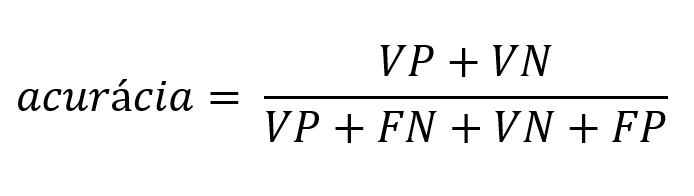

- ***Matriz de Confusão***
  - A Matriz de Confusão é uma tabela que permite a visualização do desempenho de um modelo classificatório. Ela apresenta de forma detalhada o resultado da classificação, **comparando as previsões do modelo com os valores reais dos dados.**
  - Desse modo, a partir dessa comparação, é possível identificar erros e acertos do modelo, ajudando a avaliar sua eficácia.
  - É a partir da Matriz de Confusão que conseguimos calcular diversas métricas que ajudam a quantificar o desempenho do modelo.
    - Como por exemplo a **acurácia** citada anteriormente. Abaixo se encontra a estrutura de uma matriz de confusão.
  
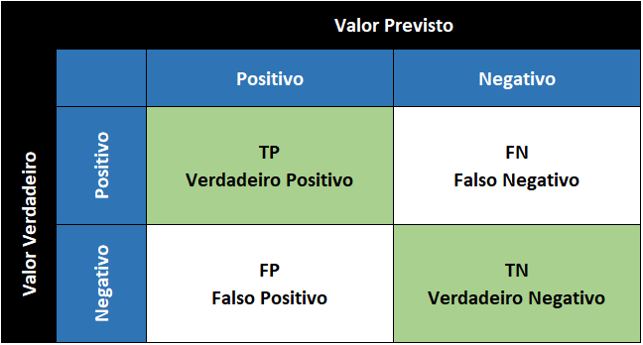

- Avaliando a **Acúracia**

In [200]:
# Importando
from sklearn.metrics import accuracy_score

In [201]:
# Para a árvore
acuracia_ad = accuracy_score(y_val, y_pred_ad)
print(f'Acúracia Árvore de Decisão: {acuracia_ad * 100:.3f}%')

# Para o knn
acuracia_knn = accuracy_score(y_val, y_pred_knn)
print(f'Acúracia KNN: {acuracia_knn * 100:.3f}%')

# Para a regressão logística
acuracia_rl = accuracy_score(y_val, y_pred_rl)
print(f'Acúracia Regressão Logística: {acuracia_rl * 100:.3f}%')

Acúracia Árvore de Decisão: 63.729%
Acúracia KNN: 67.458%
Acúracia Regressão Logística: 69.153%


- Com base nos dados, podemos dizer que a **Regressão Logística** é o melhor modelo dentre os analisados.
  - Ele obteve uma taxa de acerto de 72,5% em relação aos valores reais.



---



- Avaliando a **Matriz de Confusão**

In [202]:
# Importando
from sklearn.metrics import confusion_matrix

In [203]:
# Para a árvore
matriz_confusao_ad = confusion_matrix(y_val, y_pred_ad)

# Para o knn
matriz_confusao_knn = confusion_matrix(y_val, y_pred_knn)

# Para a regressão logística
matriz_confusao_rl = confusion_matrix(y_val, y_pred_rl)

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Função para o plot

def plot_confusion_matrix(matriz, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(title, fontsize=18)
    plt.xlabel('Previsto', fontsize=16)
    plt.ylabel('Real', fontsize=16)
    plt.show()

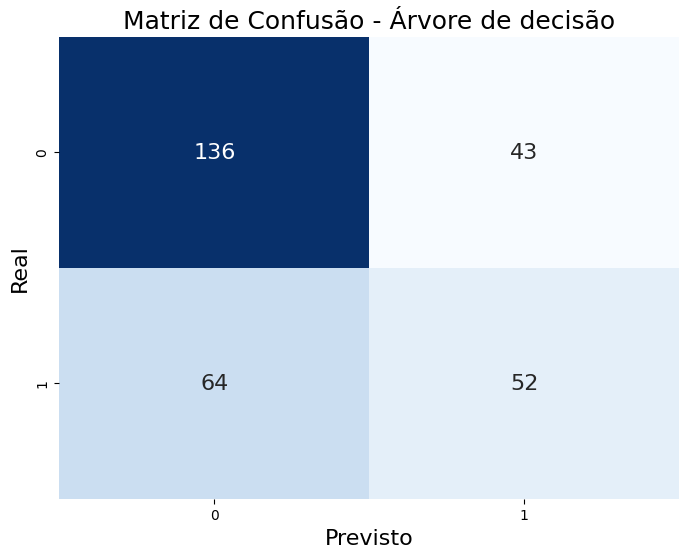

In [205]:

# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_ad, 'Matriz de Confusão - Árvore de decisão')


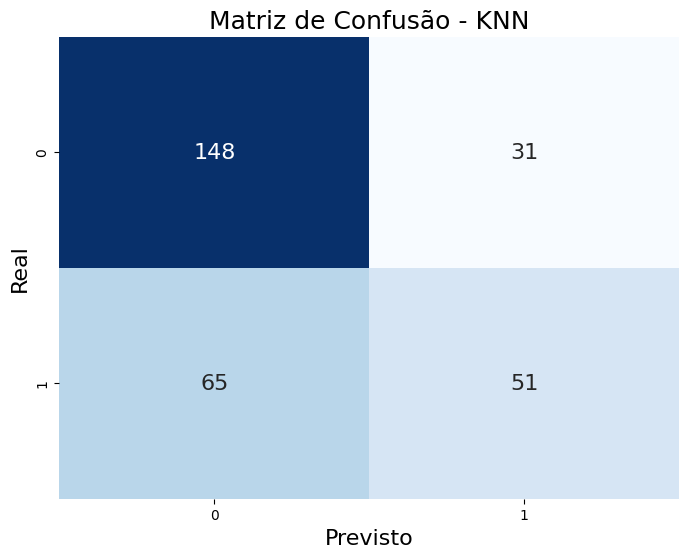

In [206]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_knn, 'Matriz de Confusão - KNN')

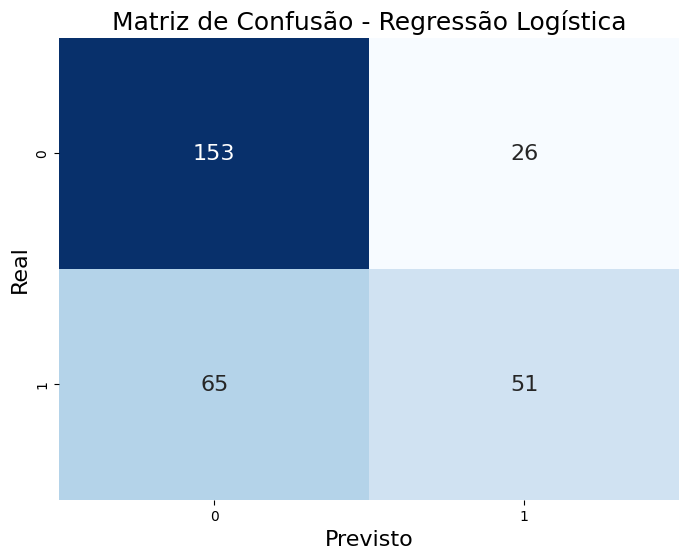

In [207]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_rl, 'Matriz de Confusão - Regressão Logística')

##Fazendo a previsão para os dados de teste
- Para isso, será usado o modelo que melhor se saiu nos testes:
  - **Regressão Logística**

In [208]:
# Visualizando o X_train

X_train.head()

,Pclass,Age,SibSp,Parch,Fare
195,1,58.000000,0,0,146.5208
332,1,38.000000,0,1,153.4625
447,1,34.000000,0,0,26.5500
887,1,19.000000,0,0,30.0000
367,3,29.699118,0,0,7.2292


In [209]:
# Visualizando a base de teste (apenas com valores numéricos)

teste_nr.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [210]:
# Precisamos eliminar a coluna de id para a base de teste ser igual a base de treino

X_teste = teste_nr.drop(['PassengerId'], axis=1)

In [211]:
# Utilizando a regressão logística na base de teste

y_pred_rl_teste = clf_rl.predict(X_teste)

In [212]:
# Criando uma nova coluna com a previssão na base de teste

teste['Survived'] = y_pred_rl_teste
display(teste)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.50000,0,0,7.8292,Q,0
1,893,3,female,47.00000,1,0,7.0000,S,0
2,894,2,male,62.00000,0,0,9.6875,Q,0
3,895,3,male,27.00000,0,0,8.6625,S,0
4,896,3,female,22.00000,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S,0
414,1306,1,female,39.00000,0,0,108.9000,C,1
415,1307,3,male,38.50000,0,0,7.2500,S,0
416,1308,3,male,30.27259,0,0,8.0500,S,0


In [213]:
# Envio
base_envio =  teste[['PassengerId', 'Survived']]
base_envio.to_csv('base_envio.csv', index=False)

# Acurácia Final Obtida
- Abaixo está a acurácia final obtida de acordo com os tratamentos e modelos utilizados neste projeto.

- Este projeto é a **Parte 1** de uma série contínua. Em cada parte, vamos tentar melhorar essa acurácia final, aplicando diferentes ações, modelos e tratamentos no dataset, com o objetivo de aumentar a precisão dos resultados finais.

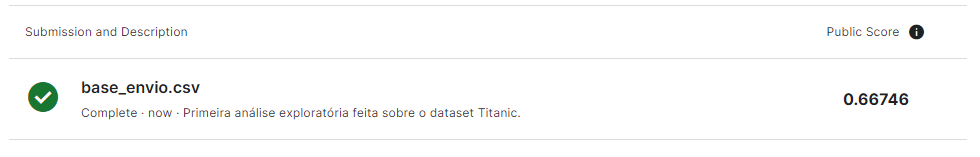